<img src="gcd.png" align="right" style="float" width="92">
<img src=https://static.casadomo.com/media/2020/02/lonmark-espana-universidad-valencia-jornada-automatizacion.png  align="right" style="float" width="150">


<font color="#CA3532"><h1 align="left">Degree in Data Science.</h1></font>
<font color="#6E6E6E"><h2 align="left">Lab Session 1. Normalization, Coding and Feature Selection. </h2></font> 

Information for the lab session available in the following link: 
https://scikit-learn.org/stable/modules/preprocessing.html

#### Miguel Ángel Fernández Torres, Yolanda Vives Gilabert, Álvaro Moreno Martínez, Marcelino Martínez Sober

## 1.1. Variable Normalization
First, we need to load the libraries required for the lab session.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Then, download the IRIS dataset available in sklearn and print its description and content.

In [2]:
iris = datasets.load_iris()

In [3]:
# Show the dataset description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# Data, input variables
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
# Target, output variable
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# Input shape
iris.data.shape

(150, 4)

In [7]:
# Output shape
iris.target.shape

(150,)

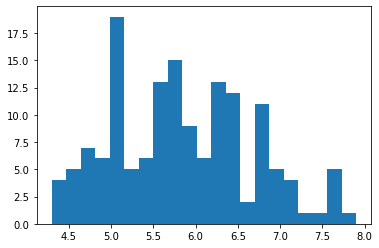

In [8]:
# Plot histogram for the first dimension
plt.hist(iris.data[:,0],21);

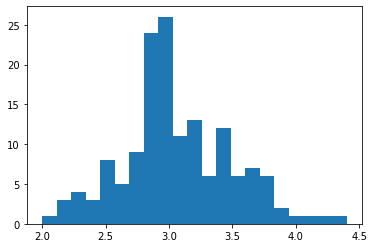

In [9]:
# Plot histogram for the second dimension
plt.hist(iris.data[:,1],21);

### Normalization of the first variable, implement it yourself!

In [10]:
X = iris.data
X_min = np.min(X[:,0])
X_max = np.max(X[:,0])
X_normalized = (X[:,0] - X_min) / (X_max - X_min)

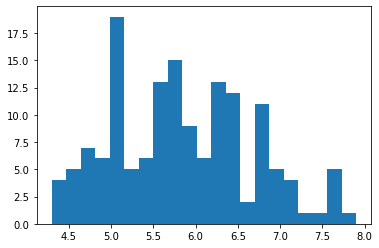

In [11]:
# Unnormalized histogram
plt.hist(X[:,0],21);

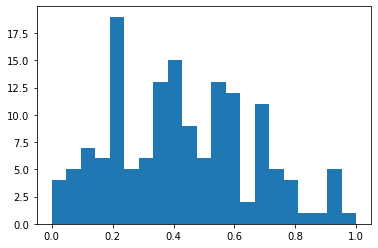

In [12]:
# Normalized histogram
plt.hist(X_normalized,21);

#### Normalization without subtracting the minimum value

In [13]:
X_n = X[:,0] / np.max(X[:,0])

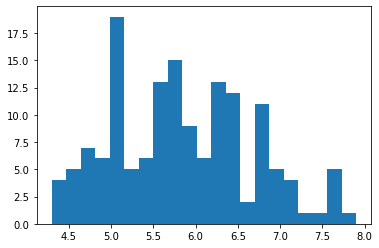

In [14]:
# Unnormalized histogram
plt.hist(X[:,0],21);

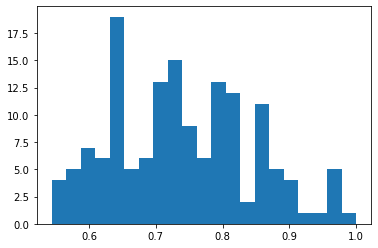

In [15]:
# Normalized histogram
plt.hist(X_n,21);

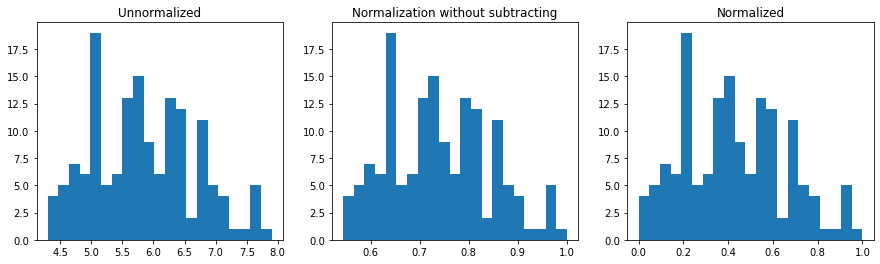

In [16]:
# Using subplot...
plt.figure(figsize=(15,4))
plt.subplot(1,3,1), plt.hist(X[:,0],21), plt.title('Unnormalized')
plt.subplot(1,3,2), plt.hist(X_n,21), plt.title('Normalization without subtracting')
plt.subplot(1,3,3), plt.hist(X_normalized,21), plt.title('Normalized');

#### Exercise: 
Repeat the procedure for the variable in the second dimension, i.e., X\[:,1\]

#### Normalization without subtracting the minimum value

In [17]:
X_n_d1 = X[:,1] / np.max(X[:,1])

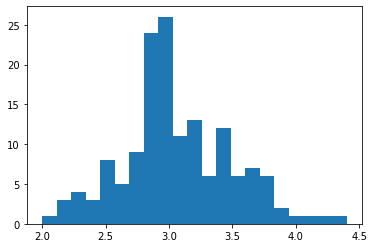

In [18]:
# Unnormalized histogram
plt.hist(X[:,1],21);

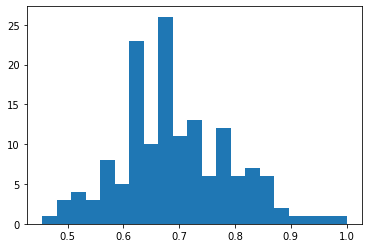

In [19]:
# Normalized histogram
plt.hist(X_n_d1,21);

#### Normalization by subtracting the minimum value

In [20]:
X_n = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))

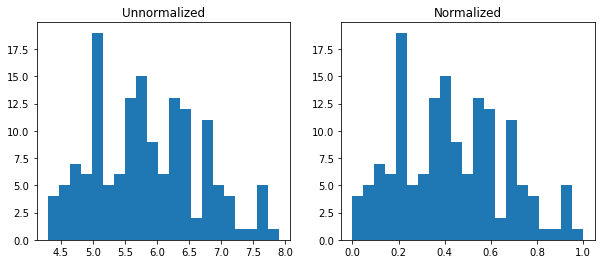

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,0],21), plt.title('Unnormalized')
plt.subplot(1,2,2), plt.hist(X_n,21), plt.title('Normalized');

#### Exercice: 
Repeat the procedure for the variable in the second dimension, i.e., X\[:,1\]

In [22]:
X_min_d1 = np.min(X[:,1])
X_max_d1 = np.max(X[:,1])
X_normalized_d1 = (X[:,1] - X_min_d1) / (X_max_d1 - X_min_d1)

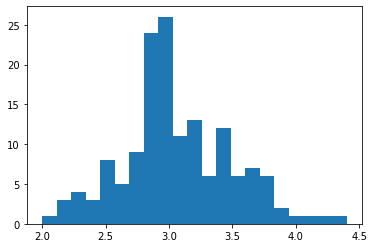

In [23]:
# Unnormalized histogram
plt.hist(X[:,1],21);

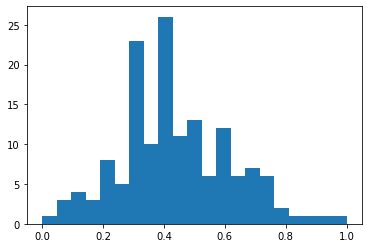

In [24]:
# Normalized histogram
plt.hist(X_normalized_d1,21);

#### Standardization

In [25]:
X_n = (X[:,0] - np.mean(X[:,0])) / (np.std(X[:,0]))

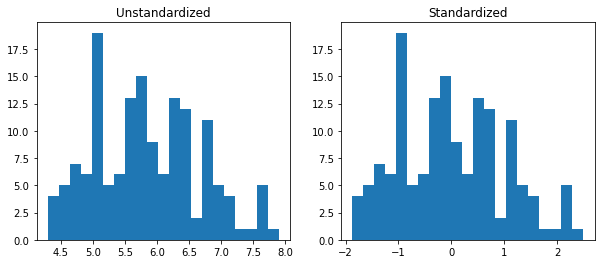

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,0],21), plt.title('Unstandardized')
plt.subplot(1,2,2), plt.hist(X_n,21), plt.title('Standardized');

#### Exercice: 
Repeat the procedure for the variable in the second dimension, i.e., X\[:,1\]

In [27]:
X_n_d1 = (X[:,1] - np.mean(X[:,1])) / (np.std(X[:,1]))

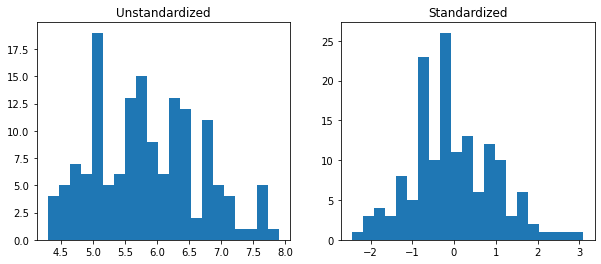

In [28]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,0],21), plt.title('Unstandardized')
plt.subplot(1,2,2), plt.hist(X_n_d1,21), plt.title('Standardized');

#### Exercise:

Explain the difference between the 3 methods applied above.

#### Standarization
- Process: To standardize a variable, you subtract the mean of the variable from each data point and then divide the result by the standard deviation of the variable.
- Standardization centers the data around zero and scales it so that it has unit variance. This makes it suitable for algorithms that are sensitive to the scale of the data, such as many machine learning algorithms like support vector machines and k-means clustering

#### Normalization by subtracting the minimum value
- Process: To normalize a variable using Min-Max scaling, you subtract the minimum value of the variable from each data point and then divide the result by the range (the difference between the maximum and minimum values) of the variable.
- Min-Max scaling scales the data to a specific range, making it suitable for algorithms that require input data to fall within a certain range, like neural networks or algorithms that use distance-based metrics.

#### Normalization without subtracting the minimum value
- Process: To perform this type of normalization, you only divide each data point by the range of the variable, without subtracting the minimum value.
- This method scales the data to a specified range but maintains the original distribution's location



### Normalization using Sklearn

https://scikit-learn.org/stable/modules/preprocessing.html

In [29]:
from sklearn import preprocessing

#### Standardization

In [30]:
# Usamos la función de estandarización del sklearn
X_n = preprocessing.scale(X[:,0])

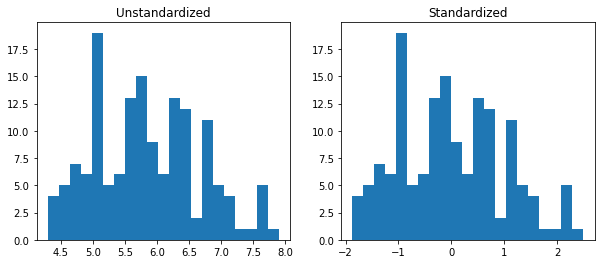

In [31]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,0],21), plt.title('Unstandardized')
plt.subplot(1,2,2), plt.hist(X_n,21), plt.title('Standardized');

#### Using normalization models in Sklearn

In [32]:
X[:,0].shape

(150,)

In [33]:
# Create and fit the standardization function
scaler = preprocessing.StandardScaler().fit(X)

In [34]:
# The function stores information about the original data

# Mean
print(scaler.mean_)

# Standard deviation
print(scaler.scale_)

[5.84333333 3.05733333 3.758      1.19933333]
[0.82530129 0.43441097 1.75940407 0.75969263]


In [35]:
# To standardize data, we only have to apply the fitted function
X_n = scaler.transform(X)

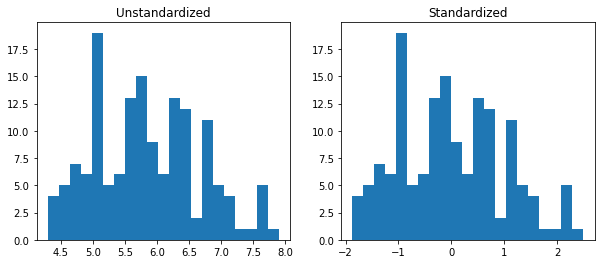

In [36]:
# Visualize the first dimension standardized
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X[:,0],21), plt.title('Unstandardized')
plt.subplot(1,2,2), plt.hist(X_n[:,0],21), plt.title('Standardized');

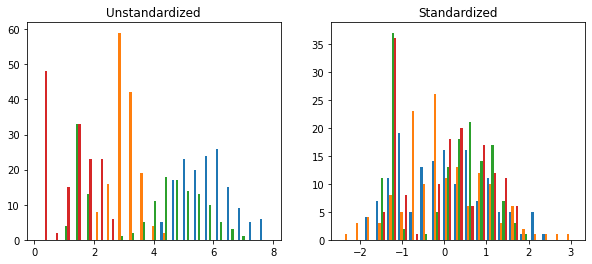

In [37]:
# It should be noted that all the dimensions have been standardized now
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.hist(X,21), plt.title('Unstandardized')
plt.subplot(1,2,2), plt.hist(X_n,21), plt.title('Standardized');

#### Exercise: 
There are other normalization models available in Sklearn, try them out. What kind of normalization do they apply?
- `preprocessing.MinMaxScaler()`
- `preprocessing.MaxAbsScaler()`

In [38]:
# Create and fit the standardization function
scaler_min_max = preprocessing.MinMaxScaler().fit(X)
scaler_max_abs = preprocessing.MaxAbsScaler().fit(X)

In [39]:
# The function stores information about the original data

# Standard deviation
print(scaler_min_max.scale_)
print(scaler_max_abs.scale_)

[0.27777778 0.41666667 0.16949153 0.41666667]
[7.9 4.4 6.9 2.5]


In [40]:
# To standardize data, we only have to apply the fitted function
X_n_min_max = scaler_min_max.transform(X)
X_n_max_abs = scaler_max_abs.transform(X)

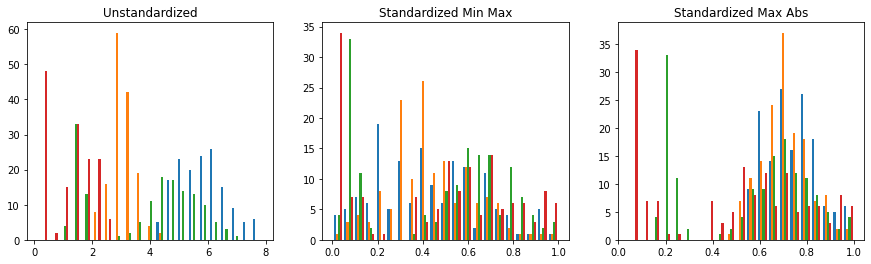

In [41]:
# It should be noted that all the dimensions have been standardized now
plt.figure(figsize=(15,4))
plt.subplot(1,3,1), plt.hist(X,21), plt.title('Unstandardized')
plt.subplot(1,3,2), plt.hist(X_n_min_max,21), plt.title('Standardized Min Max')
plt.subplot(1,3,3), plt.hist(X_n_max_abs,21), plt.title('Standardized Max Abs');

#### Exercise:
The use of normalization models allow normalizing any dataset/subset by using exactly the same transformation. This is useful to normalize training, validation, and data subsets in the same way, only by considering the training data, as usual.

Divide the database into train/test splits, train the normalization model using the training subset, and normalize both training and validation subsets using this model. Hint: Use the `train_test_split` function in sklearn.

In [42]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



In [43]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

1.0

## 1.2 Data Coding

### Ordinal Coding
This coding technique maps each class to an integer number.

In [44]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()

X = [['Class0'],['Class_1'],['Class_2']]

enc.fit(X)

enc.transform([['Class_2']])

array([[2.]])

In [45]:
# It can be applied to a multiple dimension vector.
# Each dimension will have its own coding values.
enc2 = preprocessing.OrdinalEncoder()

# The first list will be "1", the second one "0"
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc2.fit(X)

enc2.transform([['female', 'from US','uses Safari']])

array([[0., 1., 1.]])

#### Exercise:
What happens if each of the dimension has a different number of classes? Provide an example by adding more samples to X.

There is less classes.

In [46]:
enc3 = preprocessing.OrdinalEncoder()

# The first list will be "1", the second one "0"
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox'], ['male', 'from Poland', 'uses Brave']]
enc3.fit(X)

enc3.transform([['female', 'from US','uses Safari']])

array([[0., 2., 2.]])

### One-hot Encoding
This coding technique transforms the output into a vector with probabilities associated to each class.

In [47]:
enc = preprocessing.OneHotEncoder()

X = [['Class_0'], ['Class_1'], ['Class_2']]
enc.fit(X)

enc.transform([['Class_2']]).toarray()

array([[0., 0., 1.]])

#### Exercise: 
What happens if we have multiple dimensions per sample/observation? Provide an example to justify your answer.

In the output it will generate extra dimention of array for each dimension of sample.

In [48]:
enc = preprocessing.OneHotEncoder()

X = [['Class_0'], ['Class_1'], ['Class_2']]
enc.fit(X)

enc.transform([['Class_0'], ['Class_2']]).toarray()

array([[1., 0., 0.],
       [0., 0., 1.]])

#### Categories available can be specified, and even make a decision on how to handle unknown categories (e.g., ignore them).

In [49]:
enc = preprocessing.OneHotEncoder(handle_unknown='ignore')

X = [['Class_0'],['Class_1'],['Class_2']]
enc.fit(X)

enc.transform([['Class_3']]).toarray()

array([[0., 0., 0.]])

### Data Discretization

If data are continuous or discrete values, but we want them to be categorized, i.e., transformed into categories, discretization can be applied to this end. The process is similar to the generation of a histogram where each sample is assigned to a particular *bin*, being this a class in this specific case.

In [50]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)

In [51]:
est.transform(X) 

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

#### Exercise:
Discretize input data from IRIS database so that there are two categories for the first variable, 4 categories for the second one, 10 for the third and 5 for the fourth. Use train and validation splits to this end: train the discretizer using the training subset, and apply it later to both training and test subsets.

In [52]:
X = iris.data
est = preprocessing.KBinsDiscretizer(n_bins=[2, 4, 10, 5], encode='ordinal').fit(X)
 

In [53]:
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(est.transform(X), y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.9736842105263158

# 1.3 Feature Selection using *filter* Methods

## Correlation between input and output variables

The objective of the method is to determine which input variables in the IRIS dataset are more correlated with the output, to select those ones with the highest correlation.

In [54]:
X, y = datasets.load_iris(return_X_y=True)

#### Exercise:
Compute the correlation (`np.corrcoef`) between the input and the output variables. Show the values obtained and select two of the most suitable variables.

In [55]:
correlations = []
for i in range(X.shape[1]):
    correlation = np.corrcoef(X[:, i], y)[0, 1]
    correlations.append(correlation)

# Print the correlation values for each input variable
for i, correlation in enumerate(correlations):
    print(f"Correlation between X{i+1} and y: {correlation}")

# Select the two variables with the highest correlation
top_indices = np.argsort(np.abs(correlations))[::-1][:2]
selected_variables = [X[:, i] for i in top_indices]

# Print the selected variable indices
print(f"Indices of the two most suitable variables: {top_indices}")

Correlation between X1 and y: 0.7825612318100814
Correlation between X2 and y: -0.4266575607811243
Correlation between X3 and y: 0.9490346990083884
Correlation between X4 and y: 0.9565473328764029
Indices of the two most suitable variables: [3 2]


## Correlation between input variables

In this case the objective is to remove those input variables which are highly correlated between them, given that they do not provide extra information to the model and may hamper its performance. For instance, if we see that variables `X[:,0]` and `X[:,1]` (first and second dimension) are highly correlated, one of them will be removed.

#### Exercise:
Compute the correlation between all the input variables and remove one with high cross-correlation.

In [56]:
correlations = np.zeros([4, 4])
for i in range(X.shape[1]-1):
    for j in range(i+1, X.shape[1]):
        correlations[i][j] = np.corrcoef(X[:, i], X[:, j])[0, 1]
print(correlations)
    
max_index = np.argmax(correlations)
max_row, max_col = np.unravel_index(max_index, correlations.shape)
X_without_high_correlation = np.delete(X, max_col, axis=1)
print(X_without_high_correlation)


[[ 0.         -0.11756978  0.87175378  0.81794113]
 [ 0.          0.         -0.4284401  -0.36612593]
 [ 0.          0.          0.          0.96286543]
 [ 0.          0.          0.          0.        ]]
[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.6 1.4]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]


#### Exercise
Visualize the correlation between variables (`plt.imshow` can be used to this end).

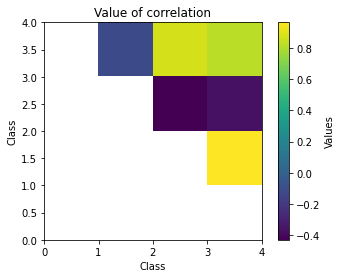

In [57]:
correlations[correlations == 0] = np.nan

# Tworzenie wykresu mapy kolorów z pominięciem NaN
plt.imshow(correlations, cmap='viridis', origin='upper', extent=[0, 4, 0, 4], interpolation='none', vmin=np.nanmin(correlations), vmax=np.nanmax(correlations))
plt.colorbar(label='Values')
plt.title('Value of correlation')
plt.xlabel('Class')
plt.ylabel('Class')

plt.show()

## Mutual Information (MI) between input and output variables

We are going to compute MI. The MI between two **discrete** variables $X,Y$ can be defined as follows:
$$ \textrm{MI}(X,Y) = \sum_{y\in \mathcal{Y}}\sum_{x\in \mathcal{X}} p(x,y)\log\left(\frac{p(x,y)}{p(x)p(y)}\right) $$
More information here: https://en.wikipedia.org/wiki/Mutual_information

First, we estimate the probability for each class given the output variable or target. We can also compute its entropy as $J(y)=-\sum p(y)\log p(y) $.

In [58]:
# Entropy for the output //discrete// variables: J(y) = -sum P(c)log(P(c))
classes = np.unique(y)
# Probability for each class
py = np.zeros(len(classes))
for nc, c in enumerate(classes):
    py[c] = np.sum(y == c)
# Transform into probabilities by normalizing with respect to the total number of samples
py /= np.sum(py)
# Compute the entropy
jy = -np.sum(py * np.log(py))
print('p(y)', py, 'y entropy', jy)

p(y) [0.33333333 0.33333333 0.33333333] y entropy 1.0986122886681096


To work with the continuous input variables, we have to discretize or quantify them first. To this end, we can use `KBinsDiscretizer` again to define a new variable `Xd` to discretize `X`. Use 9 bins.

In [59]:
from sklearn.preprocessing import KBinsDiscretizer
# Exercise: Try out with different bins. The higher the number of bins, the finer the resolution, but the higher the entropy as well.
kbd = KBinsDiscretizer(n_bins=9, encode='ordinal')
Xd = kbd.fit_transform(X)

#### Exercise:
Use the following implementation to estimate p(x) and p(x,y), which can be later used to compute the MI between each input variable and the target.

In [60]:
# Compute the MI for each variable in X
nv = Xd.shape[1]
mi = np.zeros(nv)
# Different values in Xd
xvalues = np.unique(Xd)
for v in range(nv):
    # Compute px
    px = np.zeros(len(xvalues))
    # --------------
    for i, value in enumerate(xvalues):
        px[i] = np.sum([Xd[:,v] == value])
    px /= np.sum(px)
    # --------------

    # Compute pxy
    pxy = np.zeros((len(xvalues), len(classes)))
    # --------------
    for i, value in enumerate(xvalues):
        for j, cls in enumerate(classes):
            pxy[i,j] = np.sum((Xd[:,v] == value) & (y == cls))
    pxy /= np.sum(pxy)
    # --------------
    
    # Compute MI: sum_x(sum_y( p(x,y) * log(p(x,y) / (p(x)*p(y)) ))
    mi[v] = 0.0
    for i in range(pxy.shape[0]):
        for j in range(pxy.shape[1]):
            # Avoid dividing by 0 and logarithms = -inf
            if pxy[i,j] > 0 and px[i] > 0 and py[j] > 0:
                # --------------
                mi[v] += pxy[i,j] * np.log(pxy[i,j] / px[i] / py[j])
                # --------------

print(mi)    

[0.5032742  0.31671819 0.98041703 0.97135001]


#### Exercise
Compare the result obtained with the one provided by the scikit-learn implementation using
`sklearn.feature_selection.mutual_info_classif`.

In [61]:
from sklearn.feature_selection import mutual_info_classif
X = iris.data
y = iris.target
mi_scores = mutual_info_classif(X, y, random_state=42)
print(mi_scores)



[0.5113651  0.29942431 0.99257309 0.98564251]


Scikit-learn provides a function to select the best `k` variables, `SelectKBest`. Using this function together with `mutual_info_classif`, we can select groups of variables.

#### Exercise:
Use `sklearn.feature_selection.SelectKBest` and `mutual_info_classif` to automatically select the two best variables.

In [62]:
from sklearn.feature_selection import SelectKBest

k_best = SelectKBest(score_func=mutual_info_classif, k=2)
X_new = k_best.fit_transform(X, y)
selected_indices = k_best.get_support(indices=True)

print("Indices of the selected features:", selected_indices)

Indices of the selected features: [2 3]


* There are other statistics which can be used for classification tasks:
    - `chi2`: $\chi^2$ statistic (chi square) between X, y.
    - `f_classif`: ANOVA test between X, y.
* For regression tasks, use `mutual_info_regression` or `f_regression`.

## Mutual Information between Input Variables

Similarly to the use of correlation, if the MI between two variables is high, one of them can be removed.

#### Exercise:
Use `mutual_info_regression` between each pair of input variables to identify those with high MI. Remove one of them. 

In [63]:
from sklearn.feature_selection import mutual_info_regression
X = iris.data
y = iris.target

MI = np.zeros([4, 4])
for i in range(X.shape[1]-1):
    for j in range(i+1, X.shape[1]):
        MI[i][j] = mutual_info_regression(X[:, i:i+1], X[:, j], random_state=42)
print(MI)
    
max_index = np.argmax(MI)
max_row, max_col = np.unravel_index(max_index, MI.shape)
X_without_high_correlation = np.delete(X, max_col, axis=1)
print(X_without_high_correlation)


[[0.         0.22874701 0.87848835 0.61445313]
 [0.         0.         0.3376347  0.39353306]
 [0.         0.         0.         1.22980093]
 [0.         0.         0.         0.        ]]
[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]
 [5.4 3.9 1.7]
 [4.6 3.4 1.4]
 [5.  3.4 1.5]
 [4.4 2.9 1.4]
 [4.9 3.1 1.5]
 [5.4 3.7 1.5]
 [4.8 3.4 1.6]
 [4.8 3.  1.4]
 [4.3 3.  1.1]
 [5.8 4.  1.2]
 [5.7 4.4 1.5]
 [5.4 3.9 1.3]
 [5.1 3.5 1.4]
 [5.7 3.8 1.7]
 [5.1 3.8 1.5]
 [5.4 3.4 1.7]
 [5.1 3.7 1.5]
 [4.6 3.6 1. ]
 [5.1 3.3 1.7]
 [4.8 3.4 1.9]
 [5.  3.  1.6]
 [5.  3.4 1.6]
 [5.2 3.5 1.5]
 [5.2 3.4 1.4]
 [4.7 3.2 1.6]
 [4.8 3.1 1.6]
 [5.4 3.4 1.5]
 [5.2 4.1 1.5]
 [5.5 4.2 1.4]
 [4.9 3.1 1.5]
 [5.  3.2 1.2]
 [5.5 3.5 1.3]
 [4.9 3.6 1.4]
 [4.4 3.  1.3]
 [5.1 3.4 1.5]
 [5.  3.5 1.3]
 [4.5 2.3 1.3]
 [4.4 3.2 1.3]
 [5.  3.5 1.6]
 [5.1 3.8 1.9]
 [4.8 3.  1.4]
 [5.1 3.8 1.6]
 [4.6 3.2 1.4]
 [5.3 3.7 1.5]
 [5.  3.3 1.4]
 [7.  3.2 4.7]
 [6.4 3.2 4.5]
 [6.9 3.1 4.9]
 [5.5 2.3 4. ]
 

# 1.4. Feature Selection using *wrapper* Methods


*Wrapper* methods select those variables which are more suitable for a particular ML model. To this end, we will define a particular classification or regression model, and try all the possible combinations and groups of variables.

To test this method, we will define a simple regression task where a line will be adjusted by least squares. The task will be generated by using the `make_regression` function from scikit-learn, creating a number of informative variables lower than the total number of variables, as shown in the following code implementation.

100 samples will be generated for a regression task, given 4 input variables and 1 output variable (target). Only 3 out of the 4 variables will be required for an accurate prediction, i.e., 3 of them will be the informative ones. Moreover, a small amount of noise is added to complicate the task.

In [64]:
from sklearn.datasets import make_regression

# n_informative < n_features for this example to make sense
X, y = make_regression(n_samples=100, n_features=4, n_informative=3, n_targets=1, noise=0.01)



[  45.60120076  -97.57275385   91.39669829   13.06630314   37.40071518
  127.1822138     8.18461117  206.36863742 -113.39475972  -60.83295681
   39.69098512  -48.07362095    7.3995994    57.05829618   80.32264802
  141.0182901    69.19838715   81.11918167  120.85759695  -11.09867798
  -51.56448457   90.13040685   -5.9544866     2.20955313   64.4519529
  215.14759585  -75.25935809   48.37113099  173.72764167   21.82341543
 -108.6668918   130.95420299   38.17081593 -133.03233368  108.8762907
 -100.74503022  -26.75998216  111.27735212  -26.36498392  -56.05798543
   58.14585673   83.4981424   -10.86144261 -124.36293617  -14.3612585
   -5.32072732 -114.78749492  -23.17198212  -42.37987667   -0.89552317
 -117.12711375  175.8232447    53.65192569 -139.22777213  -28.95574588
   65.04748834  -57.63526482 -111.14400757    6.0623081   115.055498
  252.60257515 -101.66522053  -40.30843348  -61.04813314  -35.81444595
 -121.73345112  160.73491469   12.50294013   -1.2013507   -87.75831054
   31.63770

We apply a linear regression model using the `LinearRegression` function in scikit-learn and we compute the error obtained.

In [65]:
# Split into train, test subsets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33)

# Reshape y to have Nx1 shape
ytrain = ytrain.reshape(-1,1)
ytest = ytest.reshape(-1,1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xtrain, ytrain)
yp = lr.predict(Xtest)

print('MSE', np.sum((ytest - yp)**2) / len(ytest))

MSE 8.724617511529523e-05


Now we will apply the feature selection method, first by fitting the model with each of the variables independently.

#### Exercise:
Consider, one by one, the input variables to fit the linear regreession by using `LinearRegression`. Provide the results obtained by using `fit` and `predict`, as well as computing the MSE for the test subset. What is the variable which provides the model with the best performance?

In [66]:
for i in range(Xtrain.shape[1]):
    lr = LinearRegression()
    lr.fit(Xtrain[:, i:i+1], ytrain)
    yp = lr.predict(Xtest[:, i:i+1])

    print('MSE', np.sum((ytest - yp)**2) / len(ytest))
    


MSE 9100.453185823084
MSE 7680.973751555215
MSE 1123.1622129153625
MSE 8517.614328407908


#### Exercise:
Consider pairs of input variables now, trying all the combinations possible. For that purpose, you can use `combinations` from the `itertools` libraty. What are the input variables which should be selected to achieve the best performance?

In [67]:
from itertools import combinations
for c in combinations(range(4), 2):
    lr = LinearRegression()
    lr.fit(Xtrain[:,c], ytrain)
    yp = lr.predict(Xtest[:,c])

    print('MSE', np.sum((ytest - yp)**2) / len(ytest))
    # Each combo is in Xtrain[:,c]
    

MSE 8176.312466432972
MSE 1150.0874680804154
MSE 9021.25579844552
MSE 299.0194000660763
MSE 7397.452846787572
MSE 1112.2360478299859


Finally, consider groups of three variables... What are the ones which should be selected to achieve the best performance?

In [68]:
from itertools import combinations
for c in combinations(range(4), 3):
    lr = LinearRegression()
    lr.fit(Xtrain[:,c], ytrain)
    yp = lr.predict(Xtest[:,c])

    print('MSE', np.sum((ytest - yp)**2) / len(ytest))
    # Each combo is in Xtrain[:,c]

MSE 312.3473318340108
MSE 7907.302450716887
MSE 1118.1054528171353
MSE 8.715719990121394e-05
